<a href="https://colab.research.google.com/github/angiegeralis/CS360FinalProject/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
import pandas as pd
# Helper libraries
import numpy as np
import csv
import matplotlib.pyplot as plt

########NEEDED TO SAVE TO DRIVE#############
from google.colab import drive
drive.mount('/content/drive')
print(tf.__version__)

In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list


In [ ]:
!kaggle datasets download -d sgpjesus/bank-account-fraud-dataset-neurips-2022
#bank-account-fraud-dataset-neurips-2022
!mkdir Dataset
!cp /content/bank-account-fraud-dataset-neurips-2022.zip /content/Dataset/bank-account-fraud-dataset-neurips-2022.zip
!unzip -q /content/Dataset/bank-account-fraud-dataset-neurips-2022.zip -d /content/Dataset
!rm /content/Dataset/bank-account-fraud-dataset-neurips-2022





bank-account-fraud-dataset-neurips-2022.zip: Skipping, found more recently modified local copy (use --force to force download)
mkdir: cannot create directory ‘Dataset’: File exists
replace /content/Dataset/Base.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
data = pd.read_csv('Dataset/Variant I.csv',nrows=100000)
data = data.sample(frac = 1)


In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

data = data.sort_values('fraud_bool',ascending = False)
features = data[["income", "name_email_similarity", "current_address_months_count", "customer_age","has_other_cards", "proposed_credit_limit", "foreign_request", "credit_risk_score", "device_fraud_count"]]
features = features.head(3000)

data = data.head(3000)
#print(data)
label = data["fraud_bool"]

print(label.shape)
#label = data.loc[data['fraud_bool'] ==1]
#print(label)
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.25, random_state=0) #default is shuffle


#create logistic regression
lr = LogisticRegression()
lr.fit(x_train, y_train)

#get accuracy
score = lr.score(x_test, y_test)
print(score)

(3000,)
0.672


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[ 1.33977370e+00 -1.46489759e+00  1.25366770e-03  1.74526346e-02
 -1.49839757e+00  4.94772675e-04  3.08572710e-01  5.27081800e-03
  0.00000000e+00]


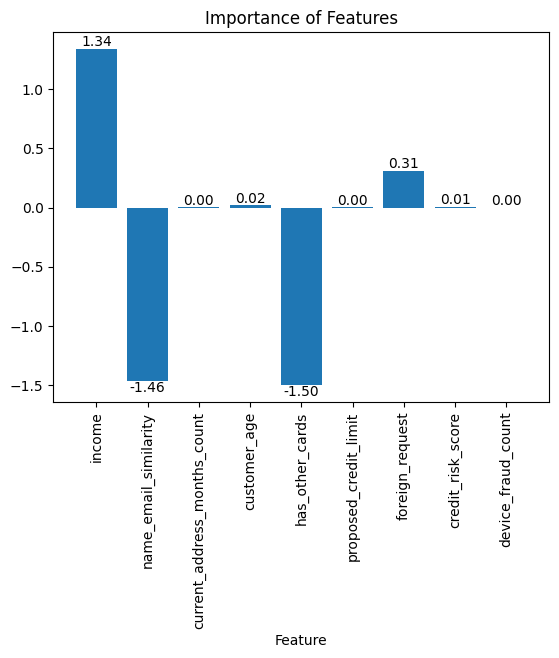

In [ ]:
importance = lr.coef_
# summarize feature importance
print(importance[0])
labels = ['income', 'name_email_similarity', 'current_address_months_count', 'customer_age', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'credit_risk_score', 'device_fraud_count']
#x for x in range(len(importance[0]))], importance[0]
# plot feature importance

#plt.bar(importance[0], label=labels)
#ax.set_xticks(x_pos, labels=people)
#plt.show()

fig, ax = plt.subplots()
x_pos = np.arange(len(labels))
hbars = ax.bar(x_pos, importance[0])
ax.set_xticks(x_pos, labels=labels, rotation = 90)
ax.set_xlabel('Feature')
ax.set_title('Importance of Features')

# Label with specially formatted floats
ax.bar_label(hbars, fmt='%.2f')
ax.set_ylim()  # adjust xlim to fit labels

plt.show()

In [ ]:
X=features
y=np.ravel(label)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Epoch 1/100
71/71 [==============================] - 4s 26ms/step - loss: 0.6951 - accuracy: 0.5636 - val_loss: 0.6797 - val_accuracy: 0.5720
Epoch 2/100
71/71 [==============================] - 1s 17ms/step - loss: 0.6217 - accuracy: 0.6387 - val_loss: 0.6473 - val_accuracy: 0.6240
Epoch 3/100
71/71 [==============================] - 1s 18ms/step - loss: 0.5892 - accuracy: 0.6813 - val_loss: 0.6338 - val_accuracy: 0.6493
Epoch 4/100
71/71 [==============================] - 1s 14ms/step - loss: 0.5731 - accuracy: 0.7018 - val_loss: 0.6275 - val_accuracy: 0.6507
Epoch 5/100
71/71 [==============================] - 1s 13ms/step - loss: 0.5642 - accuracy: 0.7133 - val_loss: 0.6246 - val_accuracy: 0.6547
Epoch 6/100
71/71 [==============================] - 1s 15ms/step - loss: 0.5590 - accuracy: 0.7227 - val_loss: 0.6230 - val_accuracy: 0.6640
Epoch 7/100
71/71 [==============================] - 1s 9ms/step - loss: 0.5554 - accuracy: 0.7267 - val_loss: 0.6217 - val_accuracy: 0.6653
Epoch 8

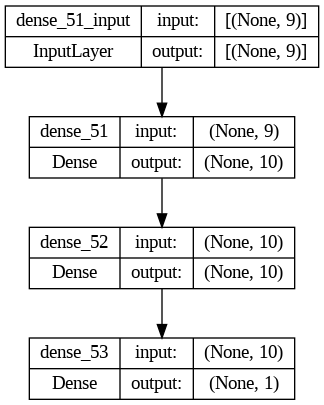

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, activation='tanh', input_shape=(9,)))
model.add(tf.keras.layers.Dense(10, activation='tanh'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer='sgd',
metrics=['accuracy'])
history = model.fit(X_train, y_train,epochs=100, validation_data = (X_test,y_test),batch_size=32, verbose=1)
tf.keras.utils.plot_model(model, "my_model.png", show_shapes=True)

loss


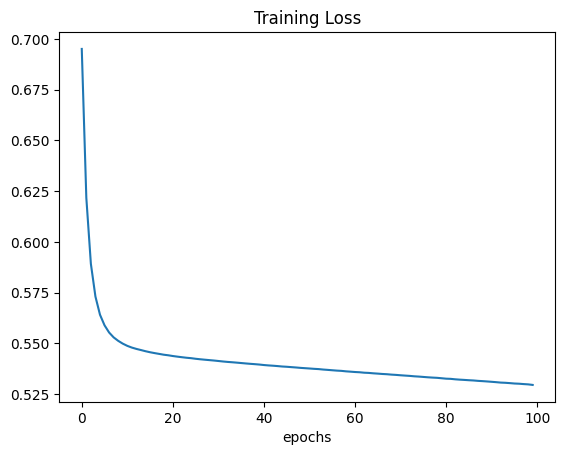

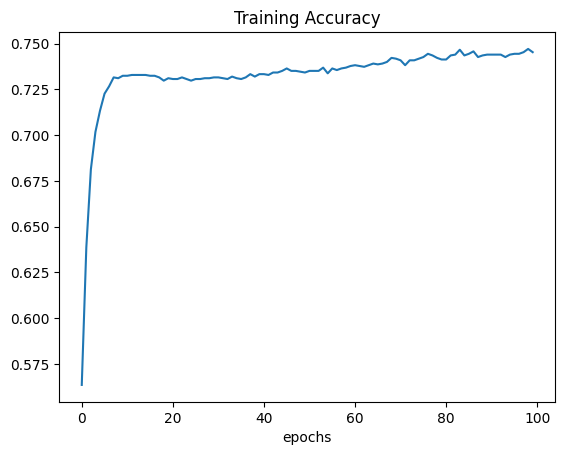

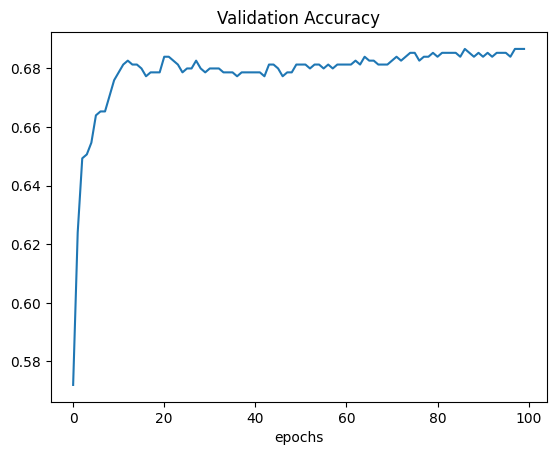

In [ ]:
print("loss")
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('epochs')
plt.title('Training Loss')
plt.show()

plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.xlabel('epochs')
plt.title('Training Accuracy')
plt.show()
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('epochs')
plt.title('Validation Accuracy')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test)
print(score)
#print(((y_pred > 0.5).astype(np.float32))[100:250])
#print(y_test[100:250])


24/24 [==============================] - 0s 2ms/step - loss: 0.6057 - accuracy: 0.6867
[0.605668842792511, 0.6866666674613953]


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance
!pip install scikeras
import scikeras
from scikeras.wrappers import KerasRegressor
#imported wrapper to see what weights of features are
X = features
y = label

my_model = KerasRegressor(build_fn=model)    
my_model.fit(X,y)

perm = PermutationImportance(my_model, random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
#imporatnce of features box plot
df_results = pd.DataFrame(data=perm.results_, columns=X.columns)
feat_imps = df_results.mean().sort_values(ascending=False)
df_results = df_results[feat_imps.index]
fig = px.box(df_results.melt(), x='variable', y='value', orientation='v')
fig.add_trace(go.Scatter(x=feat_imps.index, y=feat_imps.values, mode='markers', marker=dict(color='red'), name = 'Mean'))
fig

In [ ]:
df = pd.DataFrame(data, columns= np.array(data.columns))
fraud = df.loc[(df.fraud_bool == 1)]
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,4,figsize=(16, 4) )
i = 0
j = 0
for c in fraud.columns[2:]:
 ax[j,i].hist(fraud[c])
 ax[j,i].set_title(c)
 i = i + 1
 if i == 4:
  j = 1
  i = 0
fig.subplots_adjust(hspace=1, wspace=.3)
plt.show()

In [ ]:
df = pd.DataFrame(data, columns= np.array(data.columns))
fraud = df.loc[(df.fraud_bool == 0)]
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,4,figsize=(16, 4) )
i = 0
j = 0
for c in fraud.columns[2:]:
 ax[j,i].hist(fraud[c])
 ax[j,i].set_title(c)
 i = i + 1
 if i == 4:
  j = 1
  i = 0
fig.subplots_adjust(hspace=1, wspace=.3)
plt.show()

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
x_train.shape